In [1]:
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import TensorBoard

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (10.0, 7.5)
matplotlib.rcParams['font.size'] = 16

Using TensorFlow backend.


In [2]:
density = 100001
x = np.linspace(-10.0, 10.0, density)

In [3]:
def f(x):
    return 2.0*np.sin(x) - 3.0

noise = np.random.normal(0, 0.1, density)*0.0

In [4]:
y = f(x) + noise

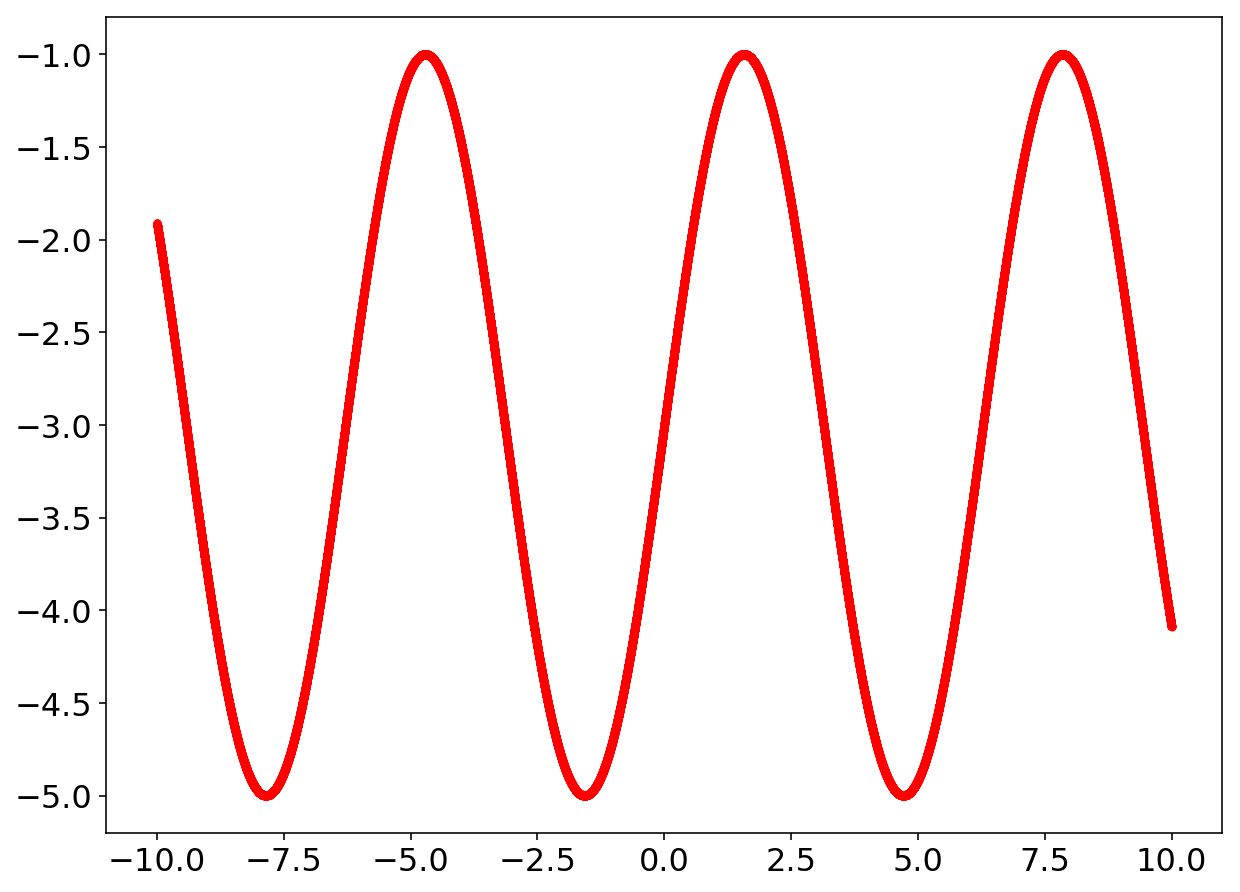

In [5]:
plt.plot(x, y, 'r.')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

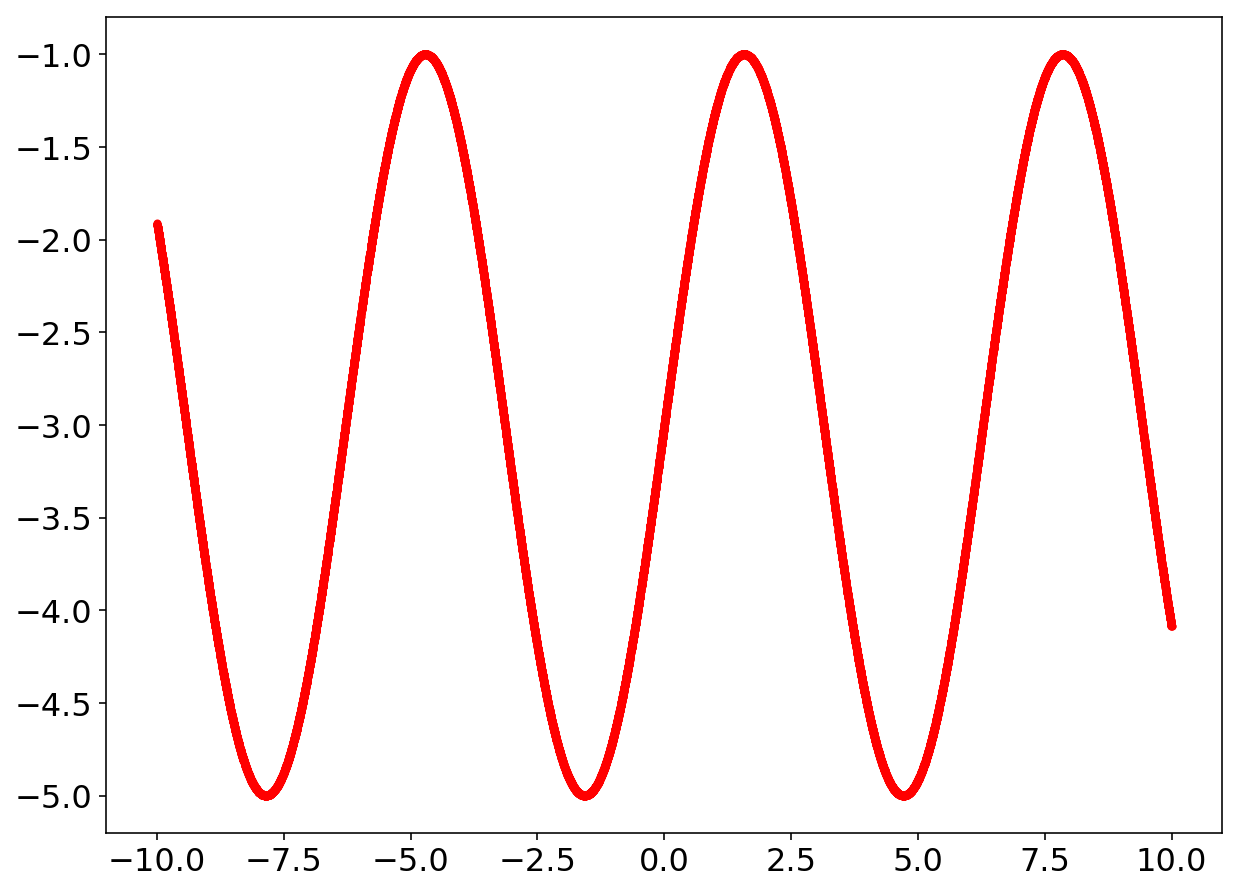

In [7]:
plt.plot(x_test, y_test, 'r.')

In [8]:
log = TensorBoard(log_dir='./logs-2/14-five-layer-better-plot-no-noise')

In [9]:
model = Sequential()
model.add(Dense(units=100, kernel_initializer='normal', activation='relu', input_dim=1))
model.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=1,  kernel_initializer='normal'))

In [10]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mae'])

In [11]:
model.count_params()

30601

In [12]:
model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 100) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'dense_5/kernel:0' shape=(100, 1) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32_ref>]

In [13]:
model.fit(x_train, y_train, epochs=40, batch_size=32, callbacks=[log])

Epoch 1/40
75000/75000 [==============================] - 2s - loss: 1.7614 - mean_absolute_error: 1.1560     
Epoch 2/40
75000/75000 [==============================] - 2s - loss: 0.3809 - mean_absolute_error: 0.3972     
Epoch 3/40
75000/75000 [==============================] - 2s - loss: 0.1253 - mean_absolute_error: 0.2146     
Epoch 4/40
75000/75000 [==============================] - 2s - loss: 0.0512 - mean_absolute_error: 0.1218     
Epoch 5/40
75000/75000 [==============================] - 2s - loss: 0.0367 - mean_absolute_error: 0.1004     
Epoch 6/40
75000/75000 [==============================] - 2s - loss: 0.0226 - mean_absolute_error: 0.0731     
Epoch 7/40
75000/75000 [==============================] - 2s - loss: 0.0128 - mean_absolute_error: 0.0503     
Epoch 8/40
75000/75000 [==============================] - 2s - loss: 0.0117 - mean_absolute_error: 0.0450     
Epoch 9/40
75000/75000 [==============================] - 2s - loss: 0.0093 - mean_absolute_error: 0.0367     
E

In [14]:
x_test[0:3]

array([-5.6966, -7.642 , -3.164 ])

In [15]:
y_test[0:3]

array([-1.89295924, -4.95523181, -2.95518906])

In [16]:
model.predict(x_test[0:3])

array([[-1.89908695],
       [-4.94899225],
       [-2.955724  ]], dtype=float32)

In [17]:
for layer in model.layers:
    print layer.get_weights()

[array([[  1.81586035e-02,  -2.34439358e-06,  -2.88937688e-01,
         -4.75610723e-04,   9.73608941e-02,   2.68790070e-02,
         -4.20851745e-02,  -7.76559711e-02,   1.96541958e-02,
         -1.88912335e-03,  -5.44521585e-02,   4.96827625e-02,
         -1.71871181e-03,  -4.49170209e-02,  -1.24416329e-01,
         -4.25836742e-01,   8.06038231e-02,  -7.07298401e-04,
          2.13375047e-01,   1.23954251e-01,  -1.14442602e-01,
         -9.46696401e-02,  -2.82966554e-01,   2.37158965e-05,
          3.53939682e-02,   1.10821007e-03,   2.25475756e-04,
          6.90499544e-02,  -1.62310377e-02,  -8.16395099e-04,
          1.78346932e-01,  -2.98552781e-01,  -1.23090893e-01,
          8.69144425e-02,  -7.49342218e-02,  -5.66965826e-02,
          4.23631817e-02,   4.53228131e-06,  -1.45797792e-04,
          2.07416713e-03,  -1.41125187e-01,  -1.66596174e-02,
         -7.36002185e-05,   5.42596169e-03,   3.79940346e-02,
          8.14692006e-02,  -8.20503086e-02,   3.03841624e-02,
       

[array([[  1.64944641e-02],
       [ -8.62106755e-02],
       [ -1.08355355e+00],
       [ -3.52251172e-01],
       [ -5.63047752e-02],
       [  9.07228142e-03],
       [  1.86198205e-02],
       [  1.01202883e-01],
       [ -1.35429472e-01],
       [ -3.29964310e-01],
       [  8.46650079e-02],
       [  9.26917195e-02],
       [ -3.92244868e-02],
       [ -5.94040036e-01],
       [ -8.28942955e-01],
       [ -1.91733211e-01],
       [ -2.92711407e-01],
       [ -2.28471547e-01],
       [  1.39625862e-01],
       [ -2.16952100e-01],
       [ -2.63764888e-01],
       [  5.55301532e-02],
       [ -5.82218729e-02],
       [  2.57808175e-02],
       [  6.99886307e-02],
       [  3.37726735e-02],
       [ -1.92877740e-01],
       [ -8.74203816e-02],
       [ -1.03453591e-01],
       [  1.28729299e-01],
       [ -2.51254350e-01],
       [  1.94709286e-01],
       [  6.17793389e-02],
       [  2.09891364e-01],
       [  9.79248732e-02],
       [  1.03882723e-01],
       [  2.75529660e-02],


In [18]:
y_ = model.predict(x_test[:1000])

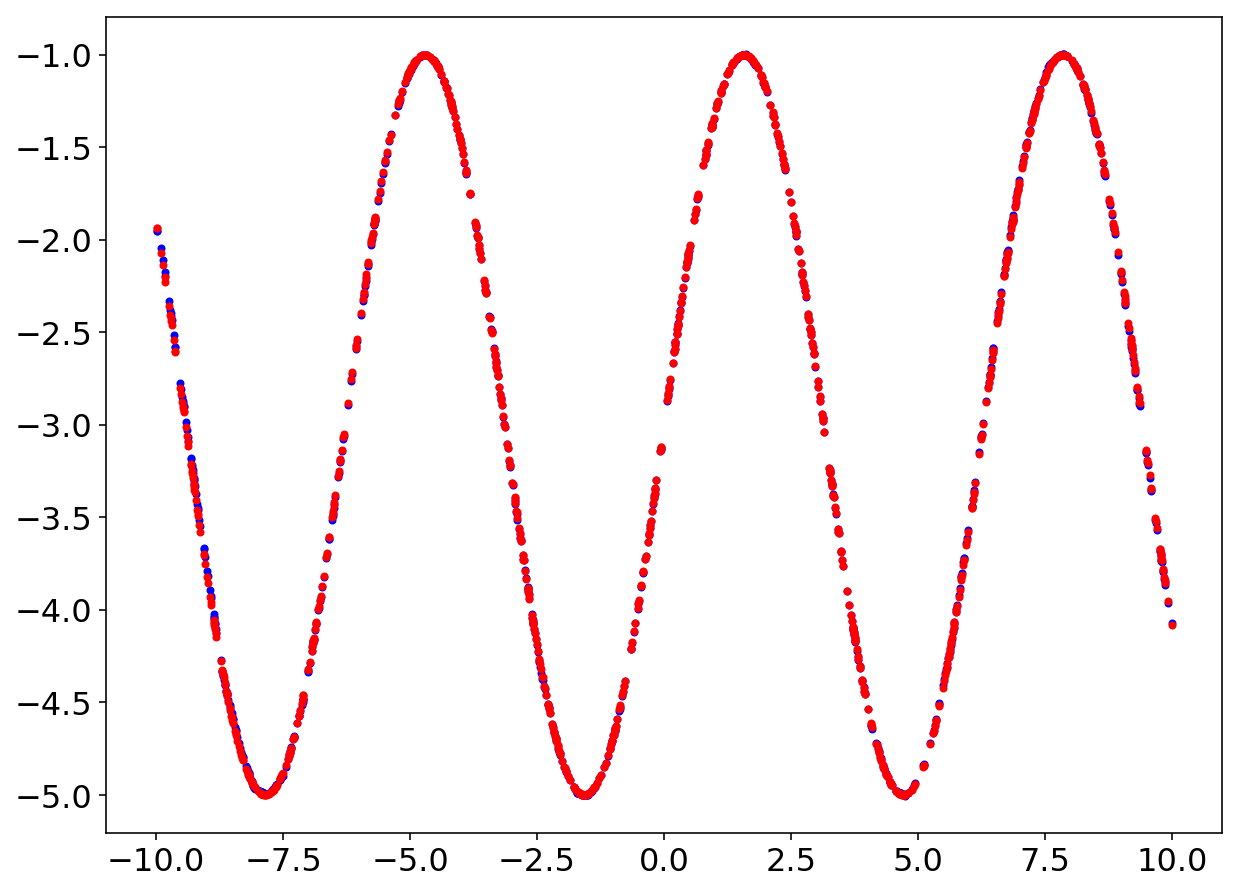

In [19]:
plt.plot(x_test[:1000], y_, 'b.')
plt.plot(x_test[:1000], y_test[0:1000], 'r.')

In [20]:
y_test[0:100] - y_

array([[  6.12770749e-03,  -3.05614485e+00,  -1.05610211e+00, ...,
         -2.52162993e+00,  -5.65743381e-02,  -1.57905185e+00],
       [  3.05603301e+00,  -6.23955460e-03,   1.99380320e+00, ...,
          5.28275366e-01,   2.99333096e+00,   1.47085345e+00],
       [  1.06276476e+00,  -1.99950781e+00,   5.34943683e-04, ...,
         -1.46499289e+00,   1.00006271e+00,  -5.22414798e-01],
       ..., 
       [  1.33381926e+00,  -1.72845330e+00,   2.71589450e-01, ...,
         -1.19393838e+00,   1.27111722e+00,  -2.51360292e-01],
       [  1.14548527e+00,  -1.91678729e+00,   8.32554618e-02, ...,
         -1.38227237e+00,   1.08278323e+00,  -4.39694280e-01],
       [  1.45780932e+00,  -1.60446324e+00,   3.95579509e-01, ...,
         -1.06994832e+00,   1.39510728e+00,  -1.27370233e-01]])